In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('hack_find').getOrCreate()

In [2]:
from pyspark.ml.clustering import KMeans

# Loads data.
dataset = spark.read.csv("hack_data.csv",header=True,inferSchema=True)

In [3]:
# dataset.take(5)

In [4]:
dataset.describe().show()

+-------+-----------------------+------------------+------------------+-----------------+------------------+-----------+------------------+
|summary|Session_Connection_Time| Bytes Transferred|   Kali_Trace_Used|Servers_Corrupted|   Pages_Corrupted|   Location|  WPM_Typing_Speed|
+-------+-----------------------+------------------+------------------+-----------------+------------------+-----------+------------------+
|  count|                    334|               334|               334|              334|               334|        334|               334|
|   mean|     30.008982035928145| 607.2452694610777|0.5119760479041916|5.258502994011977|10.838323353293413|       null|57.342395209580864|
| stddev|     14.088200614636158|286.33593163576757|0.5006065264451406| 2.30190693339697|  3.06352633036022|       null| 13.41106336843464|
|    min|                    1.0|              10.0|                 0|              1.0|               6.0|Afghanistan|              40.0|
|    max|           

In [5]:
dataset.columns

['Session_Connection_Time',
 'Bytes Transferred',
 'Kali_Trace_Used',
 'Servers_Corrupted',
 'Pages_Corrupted',
 'Location',
 'WPM_Typing_Speed']

In [6]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [7]:
feat_cols = ['Session_Connection_Time', 'Bytes Transferred', 'Kali_Trace_Used',
             'Servers_Corrupted', 'Pages_Corrupted','WPM_Typing_Speed']

In [8]:
vec_assembler = VectorAssembler(inputCols = feat_cols, outputCol='features')

In [9]:
final_data = vec_assembler.transform(dataset)

In [10]:
from pyspark.ml.feature import StandardScaler

In [11]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [12]:
scalerModel = scaler.fit(final_data)

In [13]:
cluster_final_data = scalerModel.transform(final_data)

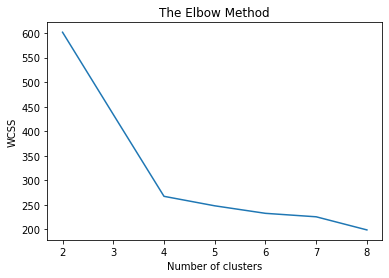

In [14]:
import matplotlib.pyplot as plt
wcss = []
for k in range(2,9):
    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(cluster_final_data)
    wcsss = model.computeCost(cluster_final_data)
    wcss.append(wcsss)
    

plt.plot(range(2,9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So optimal Number clusters are 4 from above diagram 